## Download Audit Opinion set from Audit Analytics data from WRDS

-------------------------

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import wrds
import matplotlib.pyplot as plt
pd.options.display.max_columns=200

-------------

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Get variable list

In [3]:
auditop_vars= conn.describe_table(library='audit', table='auditopin')['name']
print(len(auditop_vars))

Approximately 349662 rows in audit.auditopin.
225


In [4]:
for var in auditop_vars:
    print(var)

audit_op_key
auditor_affil_fkey
auditor_affilname
auditor_fkey
auditor_name
sig_date_of_op_x
sig_date_of_op_s
going_concern
auditor_city
auditor_state
auditor_state_name
auditor_country
auditor_region
auditor_con_sup_reg
fiscal_year_of_op
fiscal_year_end_op
op_aud_pcaob
pcaob_reg_num
note_1_date
note_2_date
note_3_date
note_4_date
note_5_date
accnt_basis
ftp_file_fkey
form_fkey
file_date
file_accepted
file_size
http_name_html
http_name_text
company_fkey
best_edgar_ticker
matchqu_price_date
matchqu_price_close
matchqu_tso_date
matchqu_tso
matchqu_tso_markcap
matchqu_date_qtr
matchqu_date_ttm
matchqu_filing_code_qtr
matchqu_filing_code_ttm
matchqu_annual_quindic
matchqu_balsh_book_val
matchqu_balsh_assets
matchqu_balsh_cash_equivs
matchqu_incmst_rev_qtr
matchqu_incmst_rev_ttm
matchqu_incmst_netinc_qtr
matchqu_incmst_netinc_ttm
matchqu_incmst_extraitm_qtr
matchqu_incmst_extraitm_ttm
matchqu_incmst_ebitda_qtr
matchqu_incmst_ebitda_ttm
matchqu_eff_accchange_qtr
matchqu_eff_accchange_ttm
mat

In [5]:
vars_to_skip= ['matchfy', 'matchqu', 'closestfy', 'closestqu', 'priorqu', 'priorfy', 'note', 'opinion_text', 'eventdate']
for idx, var in enumerate(auditop_vars):
    if any(var_to_skip in var for var_to_skip in vars_to_skip):
        pass
    else:        
        print(idx, var)

0 audit_op_key
1 auditor_affil_fkey
2 auditor_affilname
3 auditor_fkey
4 auditor_name
5 sig_date_of_op_x
6 sig_date_of_op_s
7 going_concern
8 auditor_city
9 auditor_state
10 auditor_state_name
11 auditor_country
12 auditor_region
13 auditor_con_sup_reg
14 fiscal_year_of_op
15 fiscal_year_end_op
16 op_aud_pcaob
17 pcaob_reg_num
23 accnt_basis
24 ftp_file_fkey
25 form_fkey
26 file_date
27 file_accepted
28 file_size
29 http_name_html
30 http_name_text
31 company_fkey
32 best_edgar_ticker


### Select variables to download

In [14]:
vars_to_keep= ['audit_op_key', 'auditor_fkey', 'auditor_name', 'going_concern', 'auditor_country', 'auditor_city', 'auditor_state', 
               'fiscal_year_of_op', 'fiscal_year_end_op', 'form_fkey', 'company_fkey', 'best_edgar_ticker',
              'matchfy_sum_audfees', 'matchfy_sum_total']

### Pilot check

In [7]:
df_test= conn.get_table(library= 'audit', table='auditopin',
                       columns= vars_to_keep,
                       obs= 3)
df_test

,audit_op_key,auditor_fkey,auditor_name,going_concern,auditor_country,auditor_city,auditor_state,fiscal_year_of_op,fiscal_year_end_op,form_fkey,company_fkey,best_edgar_ticker,matchfy_sum_audfees,matchfy_sum_total
0,66900.0,5.0,Arthur Andersen LLP,0.0,USA,Philadelphia,PA,2000.0,2000-12-30,10-K,0000000020,None,200000.0,271000.0
1,78252.0,5.0,Arthur Andersen LLP,0.0,USA,Philadelphia,PA,2001.0,2001-12-29,10-K405,0000000020,None,185000.0,286000.0
2,3538.0,4.0,KPMG LLP,0.0,USA,Philadelphia,PA,2002.0,2002-12-28,10-K,0000000020,None,123700.0,148200.0


### Download all observations

In [8]:
df= conn.get_table(library= 'audit', table='auditopin',
                       columns= vars_to_keep)
print(df.shape)
df.head()

(349662, 14)


,audit_op_key,auditor_fkey,auditor_name,going_concern,auditor_country,auditor_city,auditor_state,fiscal_year_of_op,fiscal_year_end_op,form_fkey,company_fkey,best_edgar_ticker,matchfy_sum_audfees,matchfy_sum_total
0,66900.0,5.0,Arthur Andersen LLP,0.0,USA,Philadelphia,PA,2000.0,2000-12-30,10-K,0000000020,None,200000.0,271000.0
1,78252.0,5.0,Arthur Andersen LLP,0.0,USA,Philadelphia,PA,2001.0,2001-12-29,10-K405,0000000020,None,185000.0,286000.0
2,3538.0,4.0,KPMG LLP,0.0,USA,Philadelphia,PA,2002.0,2002-12-28,10-K,0000000020,None,123700.0,148200.0
3,39225.0,6.0,Grant Thornton LLP,0.0,USA,Philadelphia,PA,2003.0,2004-01-03,10-K,0000000020,None,137100.0,137100.0
4,84748.0,6.0,Grant Thornton LLP,0.0,USA,Philadelphia,PA,2004.0,2005-01-01,10-K,0000000020,None,225000.0,311000.0


### Check with Uber

In [9]:
uber= df[df.company_fkey=='0001543151']
uber.head(10)

,audit_op_key,auditor_fkey,auditor_name,going_concern,auditor_country,auditor_city,auditor_state,fiscal_year_of_op,fiscal_year_end_op,form_fkey,company_fkey,best_edgar_ticker,matchfy_sum_audfees,matchfy_sum_total
312004,401672.0,1.0,PricewaterhouseCoopers LLP,0.0,USA,San Francisco,CA,2017.0,2017-12-31,DRS,0001543151,UBER,NaN,NaN
312005,401531.0,1.0,PricewaterhouseCoopers LLP,0.0,USA,San Francisco,CA,2018.0,2018-12-31,S-1,0001543151,UBER,17389000.0,18907000.0
312006,419623.0,1.0,PricewaterhouseCoopers LLP,0.0,USA,San Francisco,CA,2019.0,2019-12-31,10-K,0001543151,UBER,24726000.0,26330000.0
312007,445044.0,1.0,PricewaterhouseCoopers LLP,0.0,USA,San Francisco,CA,2020.0,2020-12-31,10-K,0001543151,UBER,24780000.0,25555000.0
312008,475385.0,1.0,PricewaterhouseCoopers LLP,0.0,USA,San Francisco,CA,2021.0,2021-12-31,10-K,0001543151,UBER,26853000.0,27055000.0


### Rename vars

In [10]:
df.rename(columns=
         {'auditor_fkey':'afk',
         'auditor_name':'afn',
         'going_concern':'gco',
         'auditor_country':'af_ctry',
         'fiscal_year_of_op':'fy',
         'company_fkey':'cik',
         'best_edgar_ticker':'tic',
         'matchfy_sum_audfees':'audfees',
         'matchfy_sum_total':'totfees'}, 
          inplace= True)
df['big5']= (df['afk']<= 5)

In [11]:
df[['audit_op_key', 'fy', 'gco','afk', 'big5']]= df[['audit_op_key', 'fy', 'gco','afk', 'big5']].astype('int')

In [12]:
df.head()

,audit_op_key,afk,afn,gco,af_ctry,auditor_city,auditor_state,fy,fiscal_year_end_op,form_fkey,cik,tic,audfees,totfees,big5
0,66900,5,Arthur Andersen LLP,0,USA,Philadelphia,PA,2000,2000-12-30,10-K,0000000020,None,200000.0,271000.0,1
1,78252,5,Arthur Andersen LLP,0,USA,Philadelphia,PA,2001,2001-12-29,10-K405,0000000020,None,185000.0,286000.0,1
2,3538,4,KPMG LLP,0,USA,Philadelphia,PA,2002,2002-12-28,10-K,0000000020,None,123700.0,148200.0,1
3,39225,6,Grant Thornton LLP,0,USA,Philadelphia,PA,2003,2004-01-03,10-K,0000000020,None,137100.0,137100.0,0
4,84748,6,Grant Thornton LLP,0,USA,Philadelphia,PA,2004,2005-01-01,10-K,0000000020,None,225000.0,311000.0,0


In [13]:
df=df[(df.af_ctry=='USA')].drop(columns=['af_ctry'])
df['location']=df['auditor_state'] +',' + df['auditor_city']
df.shape

(317677, 14)

------------

### Check form_fkey

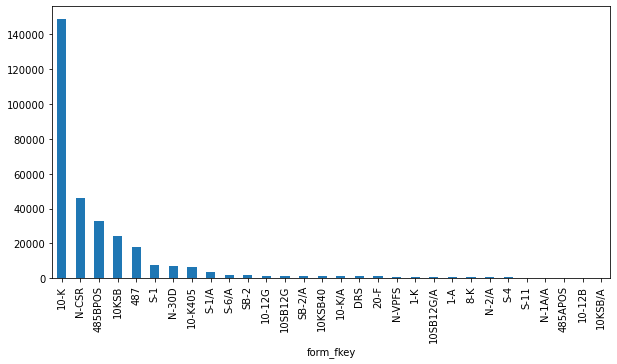

In [15]:
df.groupby('form_fkey').size().sort_values(ascending=False).head(30).plot(kind='bar',figsize= (10,5))
plt.show()

In [16]:
forms_to_keep=['10-K','10KSB', 'S-1']
df=df[df.form_fkey.isin(forms_to_keep)]
print(df.shape)

(180647, 14)


----------

### Define first and last years 

In [17]:
first_year=2000
last_year= df.fy.values.max() - 1

In [18]:
df=df[df.fy>=first_year]
df=df[df.fy<=last_year]
print(df.shape)
df.head()

(176015, 14)


,audit_op_key,afk,afn,gco,auditor_city,auditor_state,fy,fiscal_year_end_op,form_fkey,cik,tic,audfees,totfees,big5
0,66900,5,Arthur Andersen LLP,0,Philadelphia,PA,2000,2000-12-30,10-K,0000000020,None,200000.0,271000.0,1
2,3538,4,KPMG LLP,0,Philadelphia,PA,2002,2002-12-28,10-K,0000000020,None,123700.0,148200.0,1
3,39225,6,Grant Thornton LLP,0,Philadelphia,PA,2003,2004-01-03,10-K,0000000020,None,137100.0,137100.0,0
4,84748,6,Grant Thornton LLP,0,Philadelphia,PA,2004,2005-01-01,10-K,0000000020,None,225000.0,311000.0,0
5,102979,6,Grant Thornton LLP,0,Philadelphia,PA,2005,2005-12-31,10-K,0000000020,None,244000.0,281000.0,0


---------------------

## Check data with visualization

### Yearly distribution of 10-K and 10-KSB

In [19]:
df_plot= df.groupby(['fy', 'form_fkey']).size().reset_index().pivot(index= 'fy', columns='form_fkey', values= 0)
df_plot.head()

form_fkey,10-K,10KSB,S-1
fy,,,
2000,5447.0,2685.0,89.0
2001,5287.0,2892.0,105.0
2002,7277.0,3051.0,106.0
2003,7289.0,2962.0,568.0
2004,6578.0,2831.0,250.0


### Distribution by years

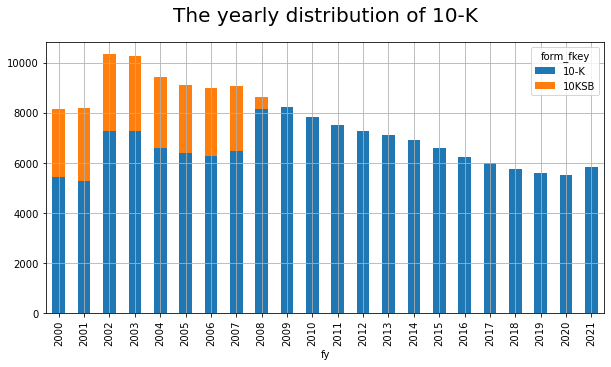

In [20]:
df_plot[['10-K','10KSB']].plot(kind='bar', grid= True, stacked= True, figsize= (10,5))
plt.title("The yearly distribution of 10-K", fontsize= 20, pad=20)
plt.show()

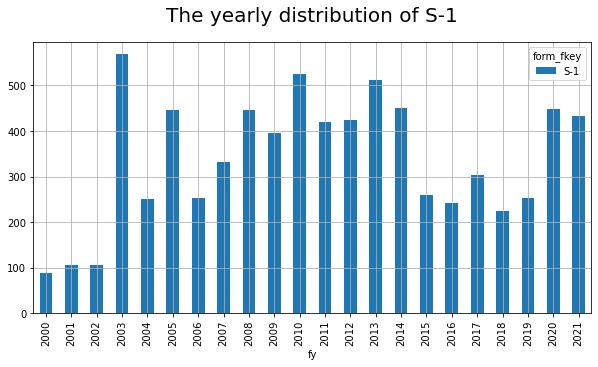

In [21]:
df_plot[['S-1']].plot(kind='bar', grid= True, stacked= True, figsize= (10,5))
plt.title("The yearly distribution of S-1", fontsize= 20, pad=20)
plt.show()

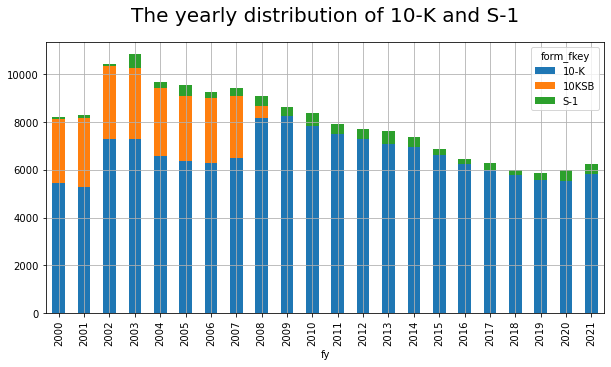

In [23]:
df_plot.plot(kind='bar', grid= True, stacked= True, figsize= (10,5))
plt.title("The yearly distribution of 10-K and S-1", fontsize= 20, pad=20)
plt.show()

### Proportion (%) of GC firms by years

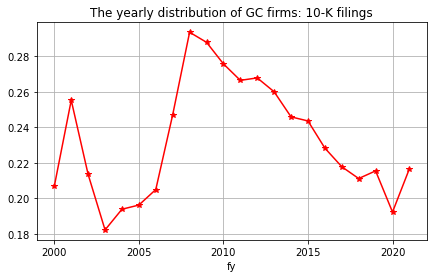

In [24]:
df.groupby(['fy']).mean()['gco'].plot(kind='line', marker='*', figsize=(7,4), grid= True, color= 'r')
plt.title('The yearly distribution of GC firms: 10-K filings')
plt.show()

----------

### States with most clients

In [25]:
df_2020= df[df.fy==2020]

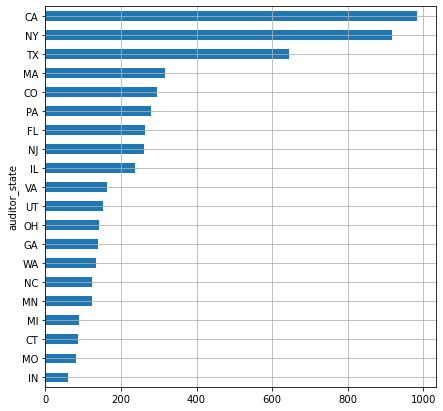

In [26]:
df_2020.groupby(['auditor_state']).size().sort_values(ascending= True).tail(20).plot(kind='barh', grid= True, figsize=(7,7))
plt.show()

### Cities with most clients

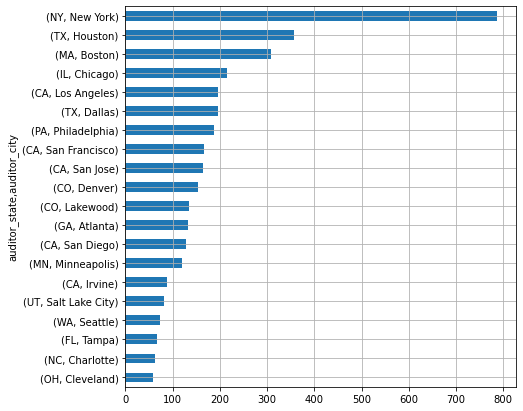

In [27]:
df_2020.groupby(['auditor_state', 'auditor_city']).size().sort_values(ascending= True).tail(20).plot(kind='barh', grid= True, figsize=(7,7))
plt.show()

### Unique states and cities

In [41]:
print("The number of unique states:", df.nunique().auditor_state)

The number of unique states: 51


In [42]:
print("The number of unique locations (i.e., state-city):", df.nunique().location)

The number of unique locations (i.e., state-city): 814


### Limit to B4 in 2020

In [43]:
df_big4= df[df.afk<=4]
print("The number of unique locations (i.e., state-city) using Big 4 sample:", df_big4.nunique().location)

The number of unique locations (i.e., state-city) using Big 4 sample: 174


In [61]:
df_big4_2020= df[(df.afk<=4) & (df.fy==2020)]
print("The number of unique locations (i.e., state-city) using Big 4 sample in 2020:", df_test.nunique().location)

The number of unique locations (i.e., state-city) using Big 4 sample in 2020: 98


In [81]:
dist= df_big4_2020.groupby(['afn', 'auditor_state']).size().reset_index().pivot(index='auditor_state', columns='afn', values=0).fillna(0).astype(int)
dist.head()

afn,Deloitte & Touche LLP,Ernst & Young LLP,KPMG LLP,PricewaterhouseCoopers LLP
auditor_state,,,,
AL,2,4,3,4
AR,0,2,0,1
AZ,20,12,5,6
CA,138,207,105,112
CO,14,21,41,8


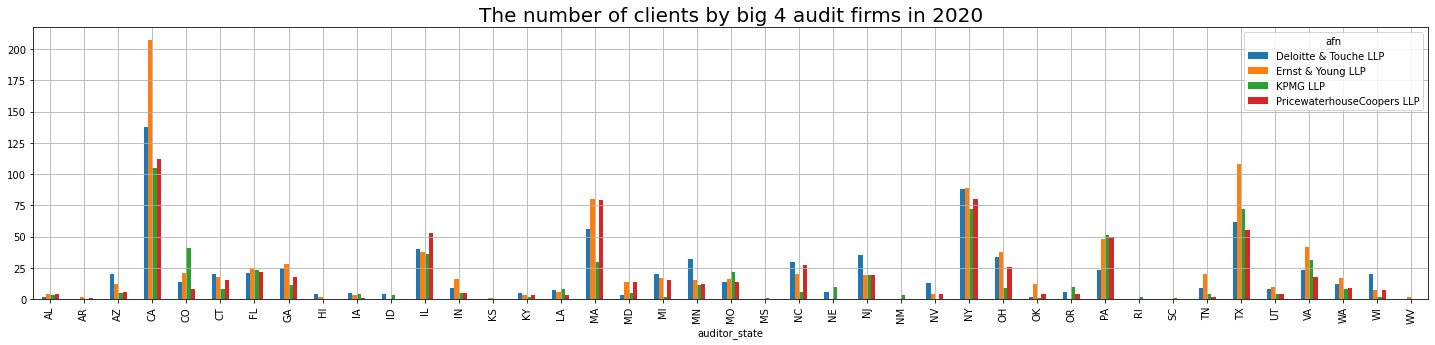

In [96]:
dist.plot(kind='bar', figsize= (25,5), grid= True)
plt.title("The number of clients by big 4 audit firms in 2020", fontsize= 20)
plt.show()

--------------------

### Save data

In [38]:
df.to_csv('data/aa_auditopin.csv', index= False)
df.head()

,audit_op_key,afk,afn,gco,auditor_city,auditor_state,fy,fiscal_year_end_op,form_fkey,cik,tic,audfees,totfees,big5,location
0,66900,5,Arthur Andersen LLP,0,Philadelphia,PA,2000,2000-12-30,10-K,0000000020,None,200000.0,271000.0,1,"PA,Philadelphia"
2,3538,4,KPMG LLP,0,Philadelphia,PA,2002,2002-12-28,10-K,0000000020,None,123700.0,148200.0,1,"PA,Philadelphia"
3,39225,6,Grant Thornton LLP,0,Philadelphia,PA,2003,2004-01-03,10-K,0000000020,None,137100.0,137100.0,0,"PA,Philadelphia"
4,84748,6,Grant Thornton LLP,0,Philadelphia,PA,2004,2005-01-01,10-K,0000000020,None,225000.0,311000.0,0,"PA,Philadelphia"
5,102979,6,Grant Thornton LLP,0,Philadelphia,PA,2005,2005-12-31,10-K,0000000020,None,244000.0,281000.0,0,"PA,Philadelphia"


### Close connection

In [39]:
conn.close()

-------------